# Import and clean data

In [1]:
pip install kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [3]:
path = '/kaggle/input/real-estate-estonia/data/2022-10-23/apartments/sale/harju/properties.csv'
data = pd.read_csv(path, index_col=0)
data.columns

Index(['Seisukord', 'Tube', 'Magamistube', 'Üldpind', 'Korrus',
       'Korruseid kokku', 'Omandiõigus', 'Turvasüsteem', 'Hind',
       'Energiamärgis', 'Materjal', 'Ehitusaasta', 'Küte', 'Sanitaar',
       'Vannitube', 'Lisaväärtused', 'Lisaruumid', 'Pliit', 'Side',
       'Rõdu pind', 'Tagatisraha', 'Suve kommunaalid', 'Talve kommunaalid',
       'Kinnistu number', 'Lift', 'Rõdu', 'Parkimine', 'Katus', 'Krunt',
       'Lisanduvad kommunaalkulud', 'Lisainfo', 'tasuta parkimine',
       'Ventilatsioon', 'Parkimiskohti', 'tasuline parkimine',
       'Lisanduvad kommunaalid', 'Maakleritasu', 'Piirangud'],
      dtype='object')

In [4]:
# Dropping uninformative columns with little to no values
DROP_COLS = ['Omandiõigus','Turvasüsteem','Krunt', 'Vannitube'
             ,'Pliit','Side','Tagatisraha','Kinnistu number'
             ,'Katus','Lisanduvad kommunaalkulud','Lisainfo','Parkimiskohti'
             ,'tasuline parkimine','Piirangud','Maakleritasu','Lisanduvad kommunaalid'
             ,'Lisaväärtused','Lisaruumid','Parkimine','tasuta parkimine','Ventilatsioon','Suve kommunaalid','Talve kommunaalid']
df = data.drop(DROP_COLS, axis=1)
df.columns

Index(['Seisukord', 'Tube', 'Magamistube', 'Üldpind', 'Korrus',
       'Korruseid kokku', 'Hind', 'Energiamärgis', 'Materjal', 'Ehitusaasta',
       'Küte', 'Sanitaar', 'Rõdu pind', 'Lift', 'Rõdu'],
      dtype='object')

In [5]:
COLUMN_MAPPING = {'Seisukord':'condition','Tube':'rooms','Magamistube':'bedrooms','Üldpind':'area','Korrus':'floor',
                 'Korruseid kokku':'total_floors','Hind':'price','Energiamärgis':'energy_label','Materjal':'house_material',
                 'Ehitusaasta':'year','Küte':'heating','Sanitaar':'sanitary','Lift':'lift','Rõdu':'balcony','Rõdu pind':'balcony_size'}
df.rename(columns=COLUMN_MAPPING, inplace=True)
df.columns

Index(['condition', 'rooms', 'bedrooms', 'area', 'floor', 'total_floors',
       'price', 'energy_label', 'house_material', 'year', 'heating',
       'sanitary', 'balcony_size', 'lift', 'balcony'],
      dtype='object')

In [6]:
df['relative_price'] = df['price']/df['area']
df = df[df['relative_price'] >500]
df.drop('relative_price', inplace=True,axis=1)


In [7]:
df.describe()

,rooms,bedrooms,area,floor,total_floors,price,year,balcony_size
count,4315.000000,3626.000000,4325.000000,4151.000000,4262.000000,4325.000000,3839.000000,1589.000000
mean,2.607416,1.802261,62.745854,3.473380,5.673393,212546.333628,1996.181037,8.973096
std,0.998488,0.832316,28.214800,2.848327,3.583626,126788.987266,43.062696,10.329769
min,1.000000,1.000000,4.000000,-1.000000,1.000000,11900.000000,1219.000000,0.000000
25%,2.000000,1.000000,44.000000,2.000000,3.000000,128000.000000,1977.000000,3.500000
50%,3.000000,2.000000,59.000000,3.000000,5.000000,185640.000000,2011.000000,5.400000
75%,3.000000,2.000000,74.100000,4.000000,7.000000,260300.000000,2022.000000,10.000000
max,11.000000,6.000000,359.000000,70.000000,30.000000,990000.000000,2024.000000,136.500000


In [8]:
# Dropping rows without the most important data
df = df[~df['price'].isna()]
df = df[~df['area'].isna()]
df = df[~df['floor'].isna()]
# Losing a lot of entries with removing nulls but simply using mean or dropping the column does not make sense
df = df[~df['year'].isnull()]
df = df[~df['rooms'].isnull()]


In [9]:
df

,condition,rooms,bedrooms,area,floor,total_floors,price,energy_label,house_material,year,heating,sanitary,balcony_size,lift,balcony
0,vajab renoveerimist,2.0,1.0,39.6,2.0,4.0,39500.0,energiamärgis määramata,kivimaja,1966.0,keskküte,dušš,NaN,NaN,NaN
2,uusehitis,4.0,3.0,79.7,3.0,3.0,314000.0,B,kivimaja,2022.0,õhk-vesi soojuspump,NaN,8.0,jah,rõdu
3,valmis,2.0,1.0,50.0,10.0,NaN,198000.0,energiamärgis määramata,betoonmaja,2003.0,keskküte,"vann,dušš,pesumasin",NaN,jah,NaN
4,"valmis,renoveeritud",2.0,1.0,54.6,5.0,6.0,246000.0,energiamärgis määramata,"betoonmaja,kivimaja",1921.0,keskküte,"pesumasin,wc ja vannituba eraldi,dušš,tsentraa...",NaN,jah,NaN
5,valmis,2.0,1.0,38.6,3.0,5.0,53000.0,E,paneelmaja,1987.0,keskküte,"dušš,pesumasin",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364,valmis,1.0,NaN,53.0,6.0,9.0,179900.0,NaN,paneelmaja,2006.0,keskküte,"tsentraalne kanalisatsioon,dušš",NaN,jah,NaN
4366,valmis,4.0,3.0,109.9,6.0,7.0,385000.0,NaN,paneelmaja,1994.0,keskküte,"saun,tsentraalne kanalisatsioon,dušš,pesumasin",8.0,jah,rõdu
4368,valmis,5.0,3.0,115.7,5.0,7.0,389000.0,energiamärgis määramata,NaN,1920.0,NaN,NaN,NaN,NaN,NaN
4369,valmis,2.0,1.0,51.0,4.0,4.0,45000.0,NaN,kivimaja,1976.0,NaN,"dušš,tsentraalne kanalisatsioon,saun,boiler",NaN,NaN,NaN


In [10]:
# If not provided, assume no balcony
df['balcony_size'] = df['balcony_size'].fillna(0)
df['balcony'] = df['balcony'].fillna(0)

def check_values(col1, col2):
    """Simple function to check if boths inputs are 0."""
    response = 1 if col1!=0 or col2!=0 else 0
    return(response)

# Apply the created function for each row to see if balcony exists.    
df['flag_balcony'] = df.apply(lambda x: check_values(x.balcony_size, x.balcony), axis=1)
df['flag_lift'] = (~df['lift'].isna()).astype(int)
df.drop(['lift','balcony_size','balcony'], axis=1, inplace=True)

<AxesSubplot:>

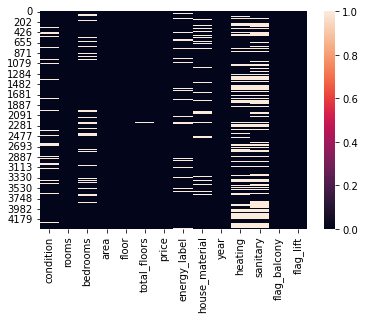

In [11]:
sns.heatmap(df.isnull())

In [12]:
df['energy_label'].unique()

array(['energiamärgis määramata', 'B', 'E', 'C', 'A', 'D', nan, 'F', 'H',
       'G', 'A,A'], dtype=object)

In [13]:
df['sanitary'].unique()[0:15]

array(['dušš', nan, 'vann,dušš,pesumasin',
       'pesumasin,wc ja vannituba eraldi,dušš,tsentraalne kanalisatsioon',
       'dušš,pesumasin', 'pesumasin,vann',
       'pesumasin,dušš,tsentraalne kanalisatsioon',
       'pesumasin,vann,wc ja vannituba eraldi', 'vann,saun,pesumasin',
       'wc ja vannituba eraldi', 'tsentraalne kanalisatsioon,dušš',
       'dušš,saun', 'dušš,pesumasin,saun', 'pesumasin,saun,dušš',
       'vann,wc ja vannituba eraldi,tsentraalne kanalisatsioon'],
      dtype=object)

In [14]:
df['heating'].unique()[0:15]

array(['keskküte', 'õhk-vesi soojuspump', 'gaasiküte',
       'põrandaküte,keskküte,gaasiküte', 'põrandaküte,keskküte', nan,
       'põrandaküte', 'keskküte,põrandaküte', 'õhksoojuspump,elektriküte',
       'põrandaküte,gaasiküte', 'kamin,gaasiküte',
       'gaasiküte,põrandaküte', 'õhksoojuspump,keskküte,põrandaküte',
       'õhksoojuspump,elektriküte,põrandaküte', 'keskküte,gaasiküte'],
      dtype=object)

In [15]:
# In order to preserve as much data as possible, filling NAs. Useful for feature engineering later.
df['house_material'] = df['house_material'].fillna('Unknown')
df['heating'] = df['heating'].fillna('Unknown')
df['condition'] = df['condition'].fillna('Unknown')
df['sanitary'] = df['sanitary'].fillna('Unknown')
df['energy_label'] = df['energy_label'].fillna('energiamärgis määramata')
df = df.replace("A,A","A")

In [16]:
#Create dummies for most important items
df['flag_shower'] = df['sanitary'].apply(lambda x: int('dušš' in x.strip().lower()))
df['flag_bath'] = df['sanitary'].apply(lambda x: int('vann' in x.strip().lower()))
df['flag_sauna'] = df['sanitary'].apply(lambda x: int('saun' in x.strip().lower()))
df['flag_generalheat'] = df['heating'].apply(lambda x: int('keskküte' in x.strip().lower()))
df['flag_floorheat'] = df['heating'].apply(lambda x: int('põrandaküte' in x.strip().lower()))
df['flag_gasheat'] = df['heating'].apply(lambda x: int('gaasiküte' in x.strip().lower()))
df['flag_electricalheat'] = df['heating'].apply(lambda x: int('õhksoojuspump' in x.strip().lower()))
df.drop('heating', axis=1, inplace=True)
df.drop('sanitary', axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3683 entries, 0 to 4370
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   condition            3683 non-null   object 
 1   rooms                3683 non-null   float64
 2   bedrooms             3154 non-null   float64
 3   area                 3683 non-null   float64
 4   floor                3683 non-null   float64
 5   total_floors         3654 non-null   float64
 6   price                3683 non-null   float64
 7   energy_label         3683 non-null   object 
 8   house_material       3683 non-null   object 
 9   year                 3683 non-null   float64
 10  flag_balcony         3683 non-null   int64  
 11  flag_lift            3683 non-null   int64  
 12  flag_shower          3683 non-null   int64  
 13  flag_bath            3683 non-null   int64  
 14  flag_sauna           3683 non-null   int64  
 15  flag_generalheat     3683 non-null   i

In [18]:
df = df[df['bedrooms']!=6]
df = df[df['rooms']<9]
df = df[df['floor']<=30.0]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3681 entries, 0 to 4370
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   condition            3681 non-null   object 
 1   rooms                3681 non-null   float64
 2   bedrooms             3153 non-null   float64
 3   area                 3681 non-null   float64
 4   floor                3681 non-null   float64
 5   total_floors         3652 non-null   float64
 6   price                3681 non-null   float64
 7   energy_label         3681 non-null   object 
 8   house_material       3681 non-null   object 
 9   year                 3681 non-null   float64
 10  flag_balcony         3681 non-null   int64  
 11  flag_lift            3681 non-null   int64  
 12  flag_shower          3681 non-null   int64  
 13  flag_bath            3681 non-null   int64  
 14  flag_sauna           3681 non-null   int64  
 15  flag_generalheat     3681 non-null   i

In [20]:
# Imputing with means based on most correlated features
df['total_floors'] = df['total_floors'].fillna(df.groupby('floor')['total_floors'].transform('mean').map(int))
df['bedrooms'] = df['bedrooms'].fillna(df.groupby('rooms')['bedrooms'].transform('mean').map(int))

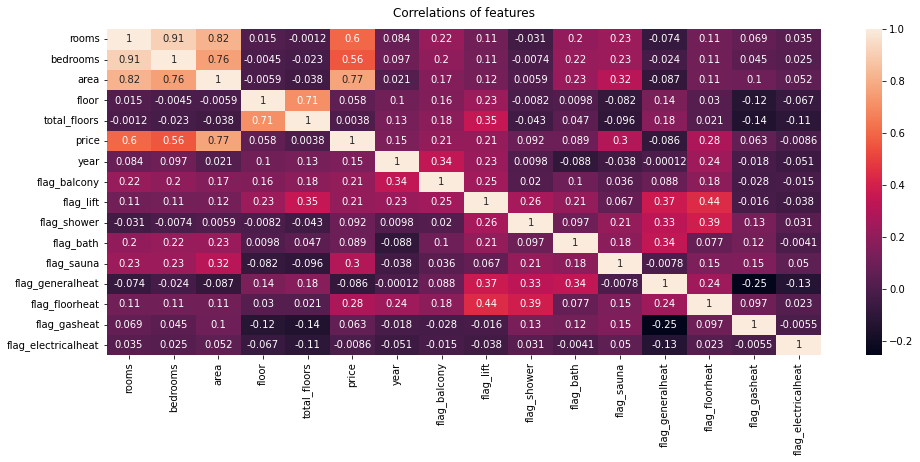

In [21]:
plt.figure(figsize=(16, 6))
correlations = sns.heatmap(df.corr(), annot=True)
correlations.set_title('Correlations of features', fontdict={'fontsize':12}, pad=12);

In [22]:
df['house_material'].unique()[0:25]

array(['kivimaja', 'betoonmaja', 'betoonmaja,kivimaja', 'paneelmaja',
       'Unknown', 'puitmaja', 'betoonmaja,kivimaja,plokkmaja',
       'plokkmaja,paneelmaja', 'kivimaja,paneelmaja', 'plokkmaja',
       'paneelmaja,kivimaja', 'betoonmaja,paneelmaja,kivimaja',
       'paneelmaja,kivimaja,plokkmaja', 'palk-kivimaja', 'palkmaja',
       'plokkmaja,kivimaja', 'betoonmaja,plokkmaja',
       'paneelmaja,kivimaja,betoonmaja', 'kivimaja,plokkmaja',
       'betoonmaja,paneelmaja', 'paneelmaja,betoonmaja',
       'puitmaja,palk-kivimaja', 'paneelmaja,plokkmaja,kivimaja',
       'kivimaja,betoonmaja,paneelmaja',
       'paneelmaja,betoonmaja,kivimaja,plokkmaja'], dtype=object)

In [23]:
df['flag_brick'] = df['house_material'].apply(lambda x: int('plokkmaja' in x.strip().lower()))
df['flag_panel'] = df['house_material'].apply(lambda x: int('paneelmaja' in x.strip().lower()))
df['flag_beton'] = df['house_material'].apply(lambda x: int('betoonmaja' in x.strip().lower()))
df['flag_stone'] = df['house_material'].apply(lambda x: int('kivimaja' in x.strip().lower()))
df['flag_wood'] = df['house_material'].apply(lambda x: int('puitmaja' in x.strip().lower()))
df.drop('house_material', axis=1, inplace=True)

In [24]:
df['condition'].unique()[0:25]

array(['vajab renoveerimist', 'uusehitis', 'valmis',
       'valmis,renoveeritud', 'renoveeritud', 'Unknown',
       'vajab kapitaalremonti', 'uusehitis,uus viimistlus',
       'renoveeritud,valmis', 'uus viimistlus,uusehitis,valmis',
       'vajab kapitaalremonti,vajab renoveerimist,valmis',
       'uus viimistlus,renoveeritud,valmis', 'uusehitis,valmis',
       'valmis,renoveeritud,uus viimistlus', 'uus viimistlus,valmis',
       'san remont tehtud', 'valmis,uusehitis', 'uus viimistlus',
       'uus viimistlus,valmis,renoveeritud',
       'uus viimistlus,renoveeritud,uusehitis,valmis',
       'uusehitis,valmis,renoveeritud,uus viimistlus',
       'san remont tehtud,renoveeritud,uus viimistlus,valmis',
       'valmis,vajab renoveerimist', 'uus viimistlus,renoveeritud',
       'uus viimistlus,uusehitis,valmis,renoveeritud'], dtype=object)

In [25]:
df['flag_newbuilding'] = df['condition'].apply(lambda x: int('uusehitis' in x.strip().lower()))
df['flag_indevelopment'] = df['condition'].apply(lambda x: int('valmimisjärgus' in x.strip().lower()))
df['flag_renovated'] = df['condition'].apply(lambda x: int('renoveeritud' in x.strip().lower()))
df['flag_needsrenovation'] = df['condition'].apply(lambda x: int('vajab renoveerimist' in x.strip().lower()))
df.drop('condition', axis=1, inplace=True)

In [26]:
summary = df.describe()
for col in summary:
    if col[0:4]=='flag':
        print("There are "+str(round(summary[col][1]*summary[col][0]))+" entries for "+col)

There are 2150 entries for flag_balcony
There are 1415 entries for flag_lift
There are 1809 entries for flag_shower
There are 1407 entries for flag_bath
There are 254 entries for flag_sauna
There are 1980 entries for flag_generalheat
There are 1073 entries for flag_floorheat
There are 312 entries for flag_gasheat
There are 68 entries for flag_electricalheat
There are 45 entries for flag_brick
There are 1176 entries for flag_panel
There are 115 entries for flag_beton
There are 1822 entries for flag_stone
There are 162 entries for flag_wood
There are 1732 entries for flag_newbuilding
There are 25 entries for flag_indevelopment
There are 578 entries for flag_renovated
There are 201 entries for flag_needsrenovation


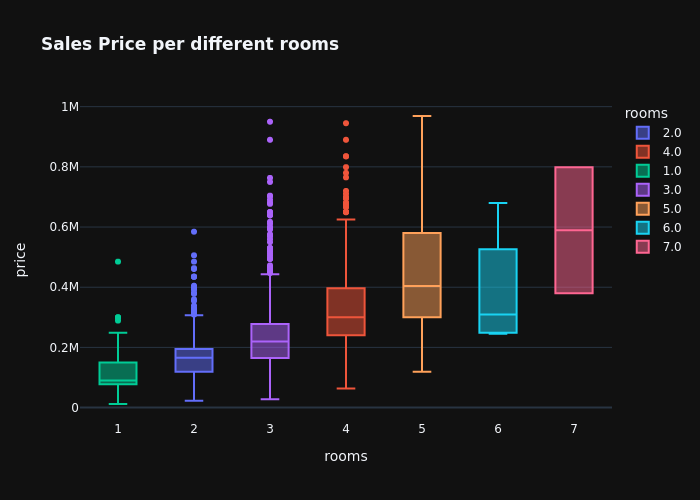

In [27]:
graph1 = px.box(df,x='rooms',y='price',color='rooms',template='plotly_dark',title='<b> Sales Price per different rooms')
graph1.show("png")


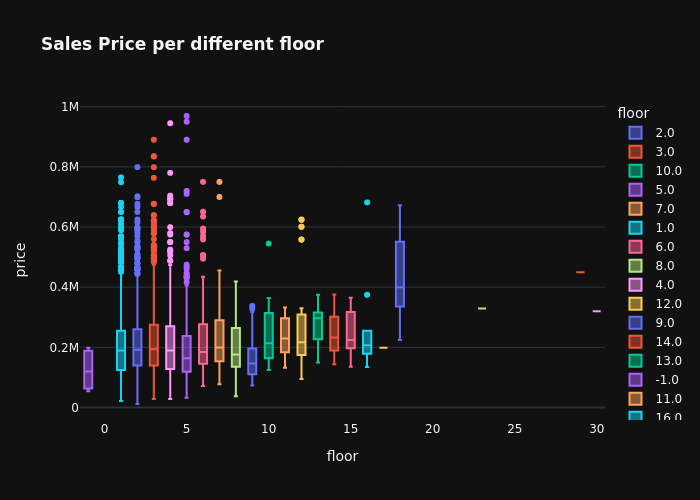

In [28]:
graph2=px.box(df,x='floor',y='price',color='floor',template='plotly_dark',title='<b> Sales Price per different floor')
graph2.show("png")

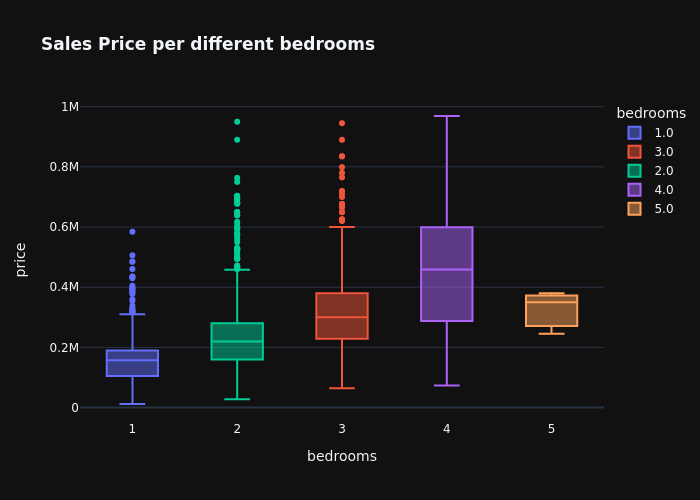

In [29]:
graph3= px.box(df,x='bedrooms',y='price',color='bedrooms',template='plotly_dark',title='<b> Sales Price per different bedrooms')
graph3.show("png")

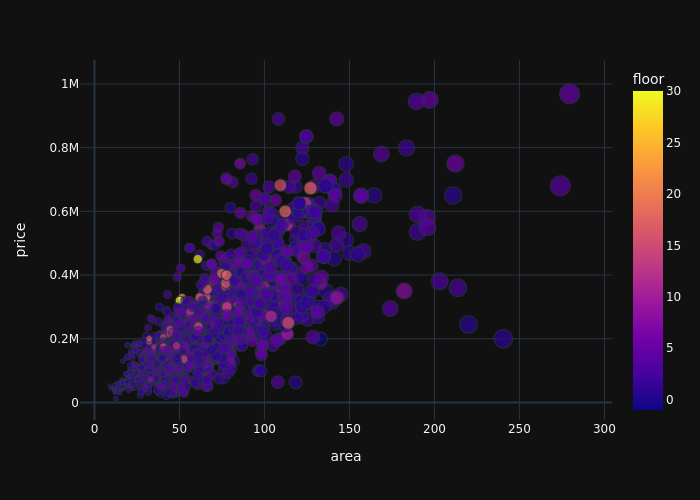

In [30]:
graph4= px.scatter(df,x='area',y='price',color='floor',size='area',template='plotly_dark')
graph4.show("png")

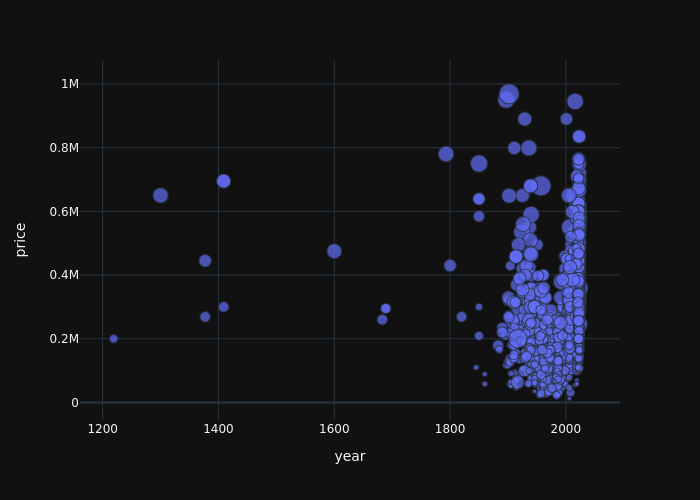

In [31]:
graph5 = px.scatter(df,x='year',y='price',size='area',template='plotly_dark')
graph5.show("png")

# Model

In [32]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_predict
from sklearn.pipeline import make_pipeline
import numpy as np


In [33]:
target_column = 'price'


In [34]:
categorical_cols = [c for c in df.columns if df[c].dtype in [object]]
numerical_cols = [c for c in df.columns if df[c].dtype in [float, int] and c not in [target_column]]
print("Categorical columns are: "+ ", ".join(categorical_cols))
print("Numerical columns are: "+ ", ".join(numerical_cols))

Categorical columns are: energy_label
Numerical columns are: rooms, bedrooms, area, floor, total_floors, year, flag_balcony, flag_lift, flag_shower, flag_bath, flag_sauna, flag_generalheat, flag_floorheat, flag_gasheat, flag_electricalheat, flag_brick, flag_panel, flag_beton, flag_stone, flag_wood, flag_newbuilding, flag_indevelopment, flag_renovated, flag_needsrenovation


In [35]:
X = df[numerical_cols+categorical_cols]
y = df[target_column]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
def cv(model, params):
    grid = GridSearchCV(model, params, scoring='neg_root_mean_squared_error', cv=5)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    return(grid.best_estimator_)

In [38]:
lgbm = LGBMRegressor()
params = {}
params['lgbmregressor__num_leaves'] = [7, 14, 21, 28, 31, 50]
params['lgbmregressor__max_depth'] = [-1, 3, 5, 8]
params['lgbmregressor__learning_rate'] = [0.15,0.1, 0.01, 0.001]
params['lgbmregressor__boosting_type'] = ['gbdt','dart','goss']


model = make_pipeline(ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),    
    ]),
    lgbm)

In [39]:
best_model = cv(model,params)
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)
print("The RMSFE error is:", round(mean_squared_error(y_test,preds)**(1/2),2))
print("The R2 is:", round(r2_score(y_test, preds),2))

{'lgbmregressor__boosting_type': 'gbdt', 'lgbmregressor__learning_rate': 0.15, 'lgbmregressor__max_depth': -1, 'lgbmregressor__num_leaves': 21}
The RMSFE error is: 48496.56
The R2 is: 0.84


In [40]:
rf = RandomForestRegressor()
params = {}
params['randomforestregressor__max_depth'] = [1,5,15,30]
params['randomforestregressor__n_estimators'] = [10,50,100,150]
params['randomforestregressor__min_samples_split'] = [2,4,8]
params['randomforestregressor__max_features'] = ["auto", "sqrt", "log2"]
params['randomforestregressor__bootstrap'] = [True, False]

model = make_pipeline(ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),    
    ]),rf
    )

In [41]:
best_model = cv(model,params)
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)
print("The RMSFE error is:", round(mean_squared_error(y_test,preds)**(1/2),2))
print("The R2 is:", round(r2_score(y_test, preds),2))

{'randomforestregressor__bootstrap': False, 'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 150}
The RMSFE error is: 49423.49
The R2 is: 0.83


In [42]:
lm = LinearRegression()
model = make_pipeline(ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),    
    ]),lm
    )
model.fit(X_train,y_train)
preds = model.predict(X_test)
print("The RMSFE error is:", round(mean_squared_error(y_test,preds)**(1/2),2))
print("The R2 is:", round(r2_score(y_test, preds),2))

The RMSFE error is: 67551.85
The R2 is: 0.69
